In [11]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm
import ISLP as islp
from ISLP.models import summarize
import utils
from scipy import stats
sns.set_theme()

### 01 - Loading dataset

We are loading the Boston dataset using `ISLP` `load_data()` method. Description of the dataset is [here](https://intro-stat-learning.github.io/ISLP/datasets/Boston.html). The set is very small: just 506 entries. All entries are `non-null`.

We need just 2 columns from this dataset:
- `medv` - median value of owner-occupied homes in $1000s, that we are trying to predict.
- `lstat` - lower status of the population (percent), our single predictor variable.

The plot below shows that there's some kind of a linear dependence between these 2 variables.

In [12]:
boston_df = islp.load_data('Boston')

In [13]:
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [14]:
boston_df.shape

(506, 13)

In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


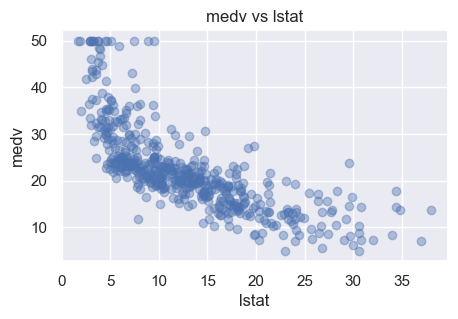

In [16]:
# Plot `lstat` against `medv`
fig, ax = subplots(figsize=(5, 3))
ax.scatter(boston_df['lstat'], boston_df['medv'], alpha=0.4)
ax.set_xlabel("lstat")
ax.set_ylabel("medv")
ax.set_title("medv vs lstat");

In [17]:
# Let's save the data to a csv file, so we can load it from the file later on.
boston_df.to_csv('boston.csv', index=False)

### 02 - Fitting the model

In [18]:
# Lets fit a simple linear regression model to the data using `statsmodels`.
# We will use the `lstat` variable to predict the `medv` variable.
X = sm.add_constant(boston_df['lstat'])
y = boston_df['medv']
model = sm.OLS(y, X).fit()

In [19]:
utils.get_stats(model, summary=True)

,coef,std_err,t,p
const,34.5538,0.5626,61.4151,0.0
lstat,-0.9500,0.0387,-24.5279,0.0


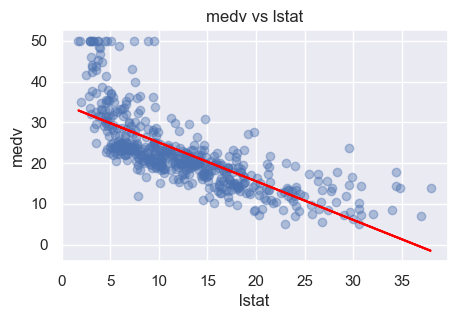

In [20]:
# Let's plot the regression line on the scatter plot.
fig, ax = subplots(figsize=(5, 3))
ax.scatter(boston_df['lstat'], boston_df['medv'], alpha=0.4)
ax.set_xlabel("lstat")
ax.set_ylabel("medv")
ax.set_title("medv vs lstat")
ax.plot(boston_df['lstat'], model.predict(X), color='red');

In [23]:
utils.get_stats(model, rse=True)

6.2158

In [26]:
# Let's compute RSE manually
residuals = y - model.predict(X)
rse = np.sqrt(np.sum(residuals**2) / (X.shape[0] - 2))
rse = np.round(rse, 4)
rse

6.2158

In [27]:
utils.get_stats(model, r_squared=True)

0.5441

### 03 - Predictions

In [21]:
# Let's compute predictions for a new value of `lstat`: [5, 10, 15]
# Let's also compute the confidence intervals for the predictions. 
pred_df = pd.DataFrame({'lstat': [5, 10, 15]})
pred_df = sm.add_constant(pred_df)
predictions = model.predict(pred_df)
conf_int = model.get_prediction(pred_df).conf_int()
pred_int = model.get_prediction(pred_df).conf_int(obs=True)

# Round the predictions and confidence intervals to 2 decimal places
predictions = np.round(predictions, 2)
conf_int = np.round(conf_int, 2)
pred_int = np.round(pred_int, 2)

# Add the predictions and confidence intervals to the dataframe
pred_df['pred'] = predictions
pred_df['pred_lower'] = conf_int[:, 0]
pred_df['pred_upper'] = conf_int[:, 1]
pred_df['pred_int_lower'] = pred_int[:, 0]
pred_df['pred_int_upper'] = pred_int[:, 1]
pred_df

,const,lstat,pred,pred_lower,pred_upper,pred_int_lower,pred_int_upper
0,1.0,5,29.80,29.01,30.60,17.57,42.04
1,1.0,10,25.05,24.47,25.63,12.83,37.28
2,1.0,15,20.30,19.73,20.87,8.08,32.53


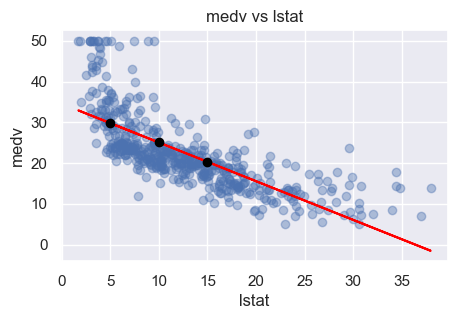

In [22]:
# Let's also plot the predictions on the scatter plot.
fig, ax = subplots(figsize=(5, 3))
ax.scatter(boston_df['lstat'], boston_df['medv'], alpha=0.4)
ax.set_xlabel("lstat")
ax.set_ylabel("medv")
ax.set_title("medv vs lstat")
ax.plot(boston_df['lstat'], model.predict(X), color='red')
ax.plot(pred_df['lstat'], pred_df['pred'], 'o', color='black');